In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [2]:
data=pd.read_csv("daily-total-female-births-CA.csv") # This is a free datset

In [3]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
data2=pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])
data2.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
data2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


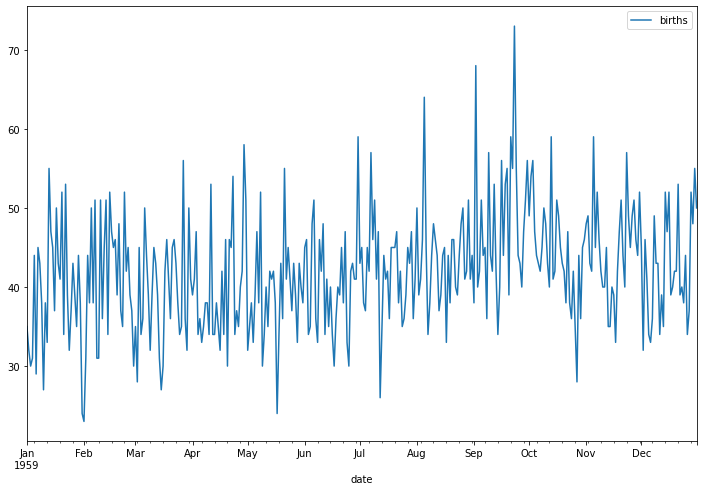

In [6]:
# data2.plot()
data2.plot(figsize=(12,8));

In [7]:
###### AUTOCORRELATION : - How Frequently my data is trying to repeate itself ?
### This Answer we can get through an 
## ACF :- AutoCorrelationFactor
## PCF :- PartialAutoCorrelationFactor

#### CORRELATION FACTOR CAN WE FIND OUT WITH THE MULTIPLE WAYS :- 
## 1) Auto - Arima 
## 2) with the help of Manual Graph
##  Not Showing any kind of Trend is known as Lag

## Another popular test for serial correlation is the Durbin-Watson statistic. 
## The DW statistic will lie in the 0-4 range, with a value near two indicating no first-order serial correlation. 
## Positive serial correlation 
## is associated with DW values below 2 and negative serial correlation with DW values above 2.

In [8]:
sm.stats.durbin_watson(data2)

# The value of Durbin-Watson statistic is close to 2 if the errors are uncorrelated. In our example, it is 0.04624491 
# That means that there is a strong evidence that the variable open has high autocorrelation.

array([0.04624491])

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


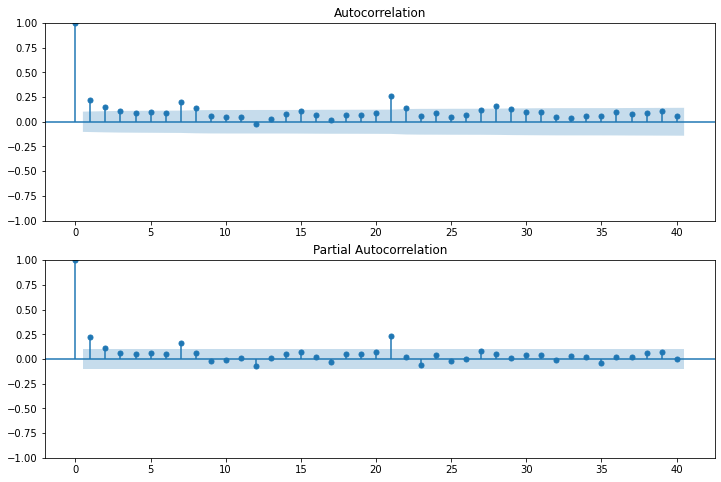

In [9]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2, lags=40, ax=ax2)

In [10]:
data2.head(2)

,births
date,
1959-01-01,35
1959-01-02,32


In [11]:
moving_average_birth=data2.rolling(window=20).mean()

In [12]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


<AxesSubplot:xlabel='date'>

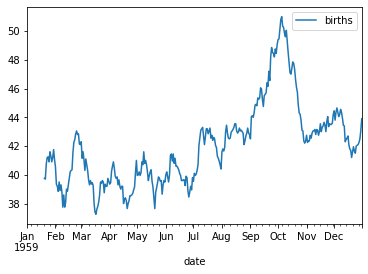

In [13]:
moving_average_birth.plot()

In [14]:
sm.stats.durbin_watson(data2)

array([0.04624491])

In [15]:
training_data=data2[0:320]
test_data=data2[320:]

In [16]:
print("Shape of the data: --->",data2.shape)
print("Shape of the data: --->",training_data.shape)
print("Shape of the data: --->",test_data.shape)

Shape of the data: ---> (365, 1)
Shape of the data: ---> (320, 1)
Shape of the data: ---> (45, 1)


In [17]:
# data2

In [18]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data2['births'], start_p=1, start_q=1,
                           max_p=2, max_q=1, m=7,
                           start_P=1,max_P=2, seasonal=True,
                           d=1, D=1, max_d = 2, max_D=2,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2806.298, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2635.646, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2713.038, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2558.991, Time=0.28 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.16 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2654.360, Time=0.24 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=2530.962, Time=0.43 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=2605.454, Time=0.27 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=1.26 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=0.72 sec
 ARIMA(2,1,1)(2,1,0)[7]             : AIC=inf, Time=2.26 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=inf, Time=1.74 sec
 ARIMA(

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                            births   No. Observations:                  365
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1212.370
Date:                           Thu, 23 Mar 2023   AIC                           2432.739
Time:                                   11:35:09   BIC                           2448.250
Sample:                               01-01-1959   HQIC                          2438.908
                                    - 12-31-1959                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9461      0.021    -44.987      0.000      -0.987      -0.905
ar.S.L7        0.0690      0.060      1.143

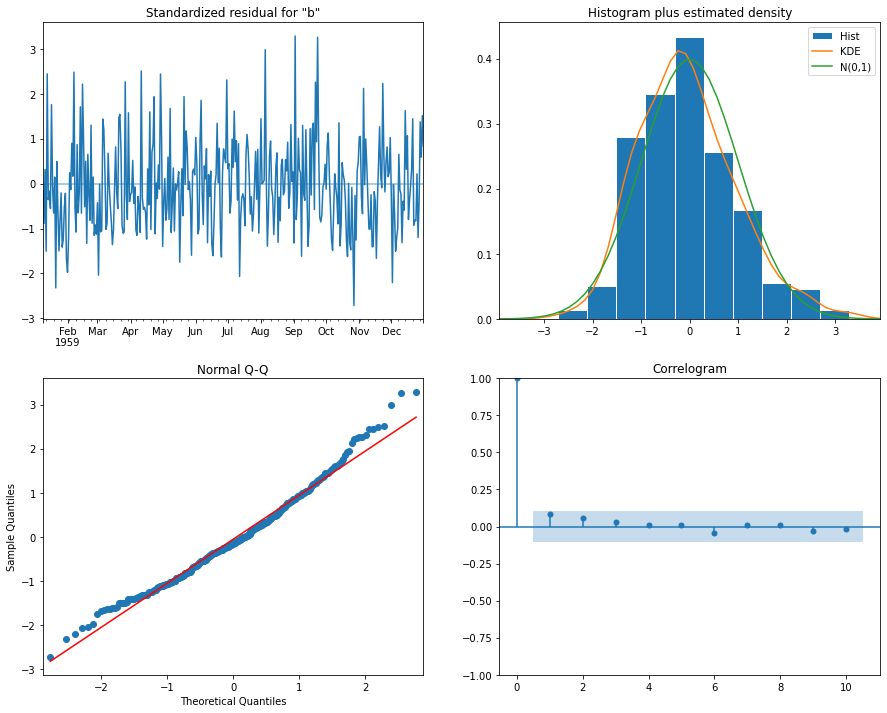

In [19]:
mod = sm.tsa.SARIMAX(data2['births'], trend='n', order=(0,1,1), seasonal_order=(1,1,1,7))  #also play with "trend" argument
results = mod.fit()
print(results.summary())

results.plot_diagnostics(figsize=(15,12))
plt.show()

In [20]:
data2['births'].shape

(365,)

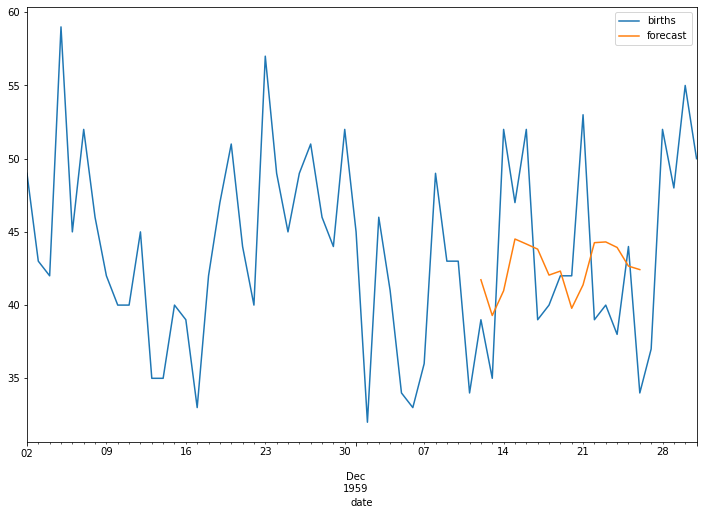

In [22]:
data2['forecast'] = results.predict(start = 345, end= 359, dynamic= True)  
data2[['births', 'forecast']].iloc[-60:].plot(figsize=(12, 8))
plt.show()